# A notebook to determine correlations on constant-slope strings

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from growthrates import *

In [2]:
def nth_correlator(S, n):
    N = len(S)
    m = (S[-1] - S[0])/(N-1)
    Cij = 0
    for i in range(n):
        Cij += (S[i-n] - S[i-1-n]) * (S[i+1] - S[i])
    for i in range(1, N-n):
        Cij += (S[i] - S[i-1]) * (S[i+n] - S[i+n-1])
    return Cij/(N-1)

def get_correlator(S):
    N = len(S)
    m = (S[-1] - S[0])/(N-1)
#     print(m)
    Cij = (S[-1] - S[-2]) * (S[1] - S[0])
    for i in range(1, N-1):
        Cij += (S[i] - S[i-1]) * (S[i+1] - S[i])
    return Cij/(N-1)

# 1-Stair

In [7]:
N = 101
init = 400
n = 1
steps  = 100
trials = 100
Nms = 21
finalCors1   = np.zeros((trials, Nms))
ms = np.linspace(-1, 1, Nms)

for i in range(Nms):
    S = reset_S(N, ms[i])
    for j in range(init):
        S = stair_update_S(S, n)
    for j in range(trials):
        for k in range(steps):
            S = stair_update_S(S, n)
        finalCors1[j, i] = get_correlator(S) - ms[i]**2

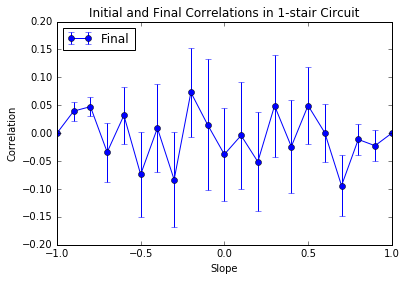

In [8]:
# Correlations
plt.errorbar(ms, np.mean(finalCors1, axis=0), yerr=np.std(finalCors1, axis=0), label="Final", fmt='-o')
# plt.plot(ms, finalCors1.max(axis=0), label="Minimum")
# plt.plot(ms, finalCors1.min(axis=0), label="Minimum")
# plt.plot(ms[ind], initialCors[ind], label="Initial")
plt.legend(loc=2)
plt.xlabel("Slope")
plt.ylabel("Correlation")
plt.title("Initial and Final Correlations in 1-stair Circuit")
# plt.savefig("../figures/correlations/1stairCorrel.pdf")
plt.show()

# 2-Stair

In [5]:
n = 2
finalCors2   = np.zeros((trials, Nms))

for i in range(Nms):
    S = reset_S(N, ms[i])
    for j in range(init):
        S = stair_update_S(S, n)
    for j in range(trials):
        for k in range(trials):
            S = stair_update_S(S, n)
        finalCors1[j, i] = get_correlator(S) - ms[i]**2

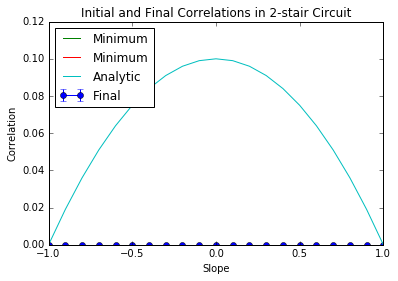

(100, 21)


In [6]:
# Correlations
plt.errorbar(ms, np.mean(finalCors2, axis=0), yerr=np.std(finalCors2, axis=0), label="Final", fmt='-o')
plt.plot(ms, finalCors2.max(axis=0), label="Minimum")
plt.plot(ms, finalCors2.min(axis=0), label="Minimum")
plt.plot(ms, .1-.1*(ms)**2, label="Analytic")
plt.legend(loc=2)
plt.xlabel("Slope")
plt.ylabel("Correlation")
plt.title("Initial and Final Correlations in 2-stair Circuit")
# plt.savefig("../figures/correlations/2stairCorrel.pdf")
plt.show()
print(np.shape(finalCors2))

# 3-Stair

In [104]:
n = 3
finalCors3   = np.zeros((trials, Nms))
for i in range(Nms):
    S = reset_S(N, ms[i])
    for j in range(init):
        S = stair_update_S(S, n)
    for j in range(trials):
        S = stair_update_S(S, n)
        finalCors3[j, i] = get_correlator(S) - ms[i]**2

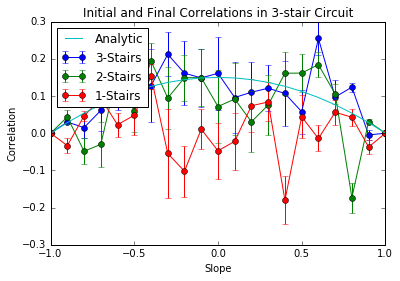

In [105]:
# Correlations
plt.errorbar(ms, np.mean(finalCors3, axis=0), yerr=np.std(finalCors3, axis=0), label="3-Stairs", fmt='-o')
plt.errorbar(ms, np.mean(finalCors2, axis=0), yerr=np.std(finalCors2, axis=0), label="2-Stairs", fmt='-o')
plt.errorbar(ms, np.mean(finalCors1, axis=0), yerr=np.std(finalCors1, axis=0), label="1-Stairs", fmt='-o')
plt.plot(ms, .15-.15*(ms)**2, label="Analytic")
plt.legend(loc=2)
plt.xlabel("Slope")
plt.ylabel("Correlation")
plt.title("Initial and Final Correlations in 3-stair Circuit")
# plt.savefig("../figures/correlations/2stairCorrel.pdf")
plt.show()

In [125]:
print(totcorrels)

[ 0.          0.03004639  0.10212535  0.14300141  0.17623108  0.16115259
  0.15114761  0.10278561  0.06000771  0.02039337  0.        ]


In [43]:
N = 100
Steps = 1000
n = 1
trials = 40
slopes = np.array([])
ts = np.arange(Steps+1)
allcorrels1 = np.zeros((trials, Steps+1))

for m in range(trials):
    S = reset_S(N, 0)
    allcorrels1[m,0] = get_correlator(S) - 0**2
    for i in range(Steps):
        S = stair_update_S(S, n)
        allcorrels1[m,i+1] = get_correlator(S) - 0**2

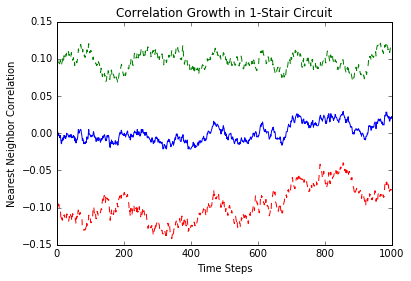

In [52]:
avgcorrels = np.mean(allcorrels1, axis=0)
std = np.std(allcorrels1, axis=0)
plt.plot(ts, avgcorrels)
plt.plot(ts, avgcorrels+std, '--')
plt.plot(ts, avgcorrels-std, '--')
# plt.plot(ts, allcorrels1.min(axis=0), label="Minimum")
# plt.plot(ts, allcorrels1.max(axis=0), label="Maximum")
plt.title("Correlation Growth in 1-Stair Circuit")
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")
# plt.savefig("../figures/correlations/1corrgrowth.pdf")
plt.show()

In [53]:
N = 100
Steps = 1000
n = 2
trials = 40
slopes = np.array([])
ts = np.arange(Steps+1)
allcorrels2 = np.zeros((trials, Steps+1))

for m in range(trials):
    S = reset_S(N, 0)
    allcorrels2[m,0] = get_correlator(S) - 0**2
    for i in range(Steps):
        S = stair_update_S(S, n)
        allcorrels2[m,i+1] = get_correlator(S) - 0**2

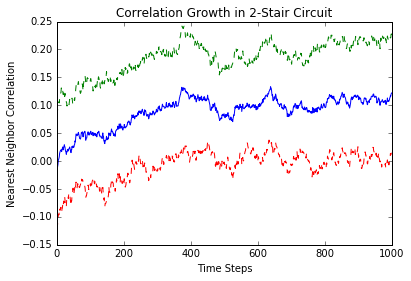

In [54]:
avgcorrels = np.mean(allcorrels2, axis=0)
std = np.std(allcorrels2, axis=0)
plt.plot(ts, avgcorrels)
plt.plot(ts, avgcorrels+std, '--')
plt.plot(ts, avgcorrels-std, '--')
# plt.plot(ts, allcorrels1.min(axis=0), label="Minimum")
# plt.plot(ts, allcorrels1.max(axis=0), label="Maximum")
plt.title("Correlation Growth in 2-Stair Circuit")
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")
# plt.savefig("../figures/correlations/2corrgrowth.pdf")
plt.show()

In [103]:
N = 101
Steps = 5000
n = 3
trials = 1
slopes = np.array([])
ts = np.arange(Steps+1)
allcorrels = np.zeros((trials, Steps+1))
slope = .9

for m in range(trials):
    S = reset_S(N, slope)
    allcorrels[m,0] = get_correlator(S) - slope**2
    for i in range(Steps):
        S = stair_update_S(S, n)
        allcorrels[m,i+1] = get_correlator(S) - slope**2

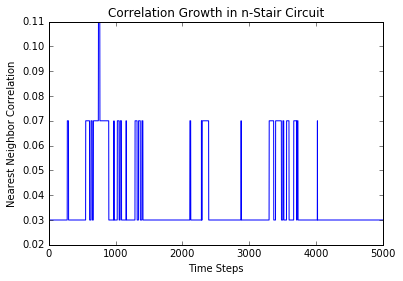

In [104]:
avgcorrels = np.mean(allcorrels, axis=0)
std = np.std(allcorrels, axis=0)
plt.plot(ts, avgcorrels)
# plt.plot(ts, avgcorrels+std, '--')
# plt.plot(ts, avgcorrels-std, '--')
# plt.plot(ts, allcorrels1.min(axis=0), label="Minimum")
# plt.plot(ts, allcorrels1.max(axis=0), label="Maximum")
plt.title("Correlation Growth in n-Stair Circuit")
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")
# plt.savefig("../figures/correlations/3corrgrowth.pdf")
plt.show()

In [59]:
N = 100
Steps = 1000
n = 10
trials = 40
slopes = np.array([])
ts = np.arange(Steps+1)
allcorrels10 = np.zeros((trials, Steps+1))

for m in range(trials):
    S = reset_S(N, 0)
    allcorrels10[m,0] = get_correlator(S) - 0**2
    for i in range(Steps):
        S = stair_update_S(S, n)
        allcorrels10[m,i+1] = get_correlator(S) - 0**2

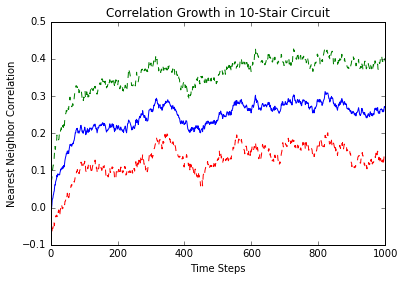

In [60]:
avgcorrels = np.mean(allcorrels10, axis=0)
std = np.std(allcorrels10, axis=0)
plt.plot(ts, avgcorrels)
plt.plot(ts, avgcorrels+std, '--')
plt.plot(ts, avgcorrels-std, '--')
# plt.plot(ts, allcorrels1.min(axis=0), label="Minimum")
# plt.plot(ts, allcorrels1.max(axis=0), label="Maximum")
plt.title("Correlation Growth in 10-Stair Circuit")
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")
# plt.savefig("../figures/correlations/10corrgrowth.pdf")
plt.show()

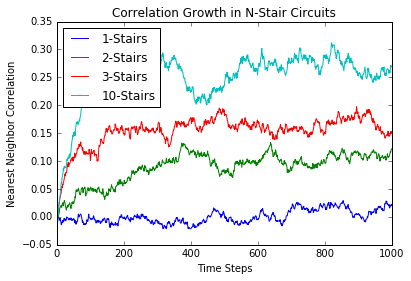

In [64]:
plt.plot(ts, np.mean(allcorrels1, axis=0), label = '1-Stairs')
plt.plot(ts, np.mean(allcorrels2, axis=0), label = '2-Stairs')
plt.plot(ts, np.mean(allcorrels3, axis=0), label = '3-Stairs')
plt.plot(ts, np.mean(allcorrels10, axis=0), label = '10-Stairs')
# plt.plot(ts, allcorrels1.min(axis=0), label="Minimum")
# plt.plot(ts, allcorrels1.max(axis=0), label="Maximum")
plt.title("Correlation Growth in N-Stair Circuits")
plt.legend(loc=2)
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")
# plt.savefig("../figures/correlations/Ncorrgrowth.pdf")
plt.show()

/Users/cstahl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


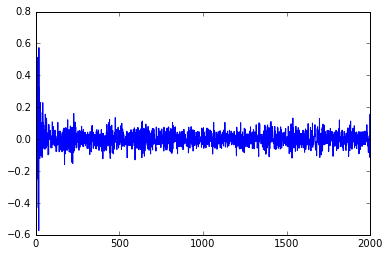

In [90]:
mean = np.log(np.mean(allcorrels3, axis=0))
plt.plot(ts[:-1], np.diff(mean), label = '3-Stairs')

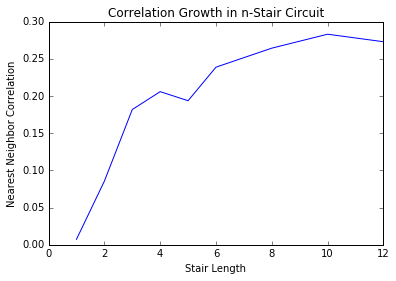

In [223]:
ns = [1,2,3,4,5,6,8,10,12]
N = 100
Steps = 20
trials = 1000
slopes = np.array([])
ts = np.arange(Steps+1)
avgcorrels = np.zeros(len(ns))

for idx, n in enumerate(ns):
    totcorrels = np.zeros(Steps+1)
    S = reset_S(N, 0)
    # evolve away from initial conditions
    for i in range(200):
        S = stair_update_S(S, n)
    for j in range(trials):
        correls = np.array([get_correlation(S)])
        # get correlations often
        for i in range(Steps):
            S = stair_update_S(S, n)
            correls = np.append(correls, nth_correlation(S,1))

        totcorrels += correls
    avgcorrels[idx] = np.average(totcorrels)/trials
plt.plot(ns, avgcorrels)
plt.title("Correlation Growth in n-Stair Circuit")
plt.xlabel("Stair Length")
plt.ylabel("Nearest Neighbor Correlation")
plt.savefig("../figures/correlations/corr1-of-n.pdf")
plt.show()

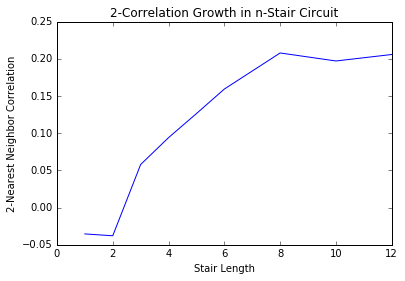

In [224]:
ns = [1,2,3,4,5,6,8,10,12]
N = 100
l = 2
Steps = 20
trials = 1000
slopes = np.array([])
ts = np.arange(Steps+1)
avgcorrels = np.zeros(len(ns))

for idx, n in enumerate(ns):
    totcorrels = np.zeros(Steps+1)
    S = reset_S(N, 0)
    # evolve away from initial conditions
    for i in range(200):
        S = stair_update_S(S, n)
    for j in range(trials):
        correls = np.array([nth_correlation(S,l)])
        # get correlations often
        for i in range(Steps):
            S = stair_update_S(S, n)
            correls = np.append(correls, nth_correlation(S,l))

        totcorrels += correls
    avgcorrels[idx] = np.average(totcorrels)/trials
plt.plot(ns, avgcorrels)
plt.title(str(l)+"-Correlation Growth in n-Stair Circuit")
plt.xlabel("Stair Length")
plt.ylabel(str(l)+"-Nearest Neighbor Correlation")
plt.savefig("../figures/correlations/corr"+str(l)+"-of-n.pdf")
plt.show()

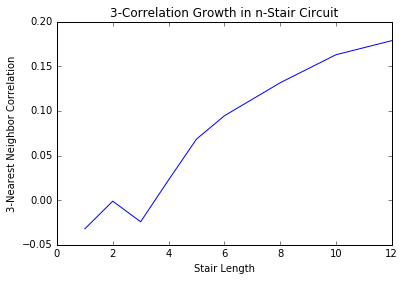

In [225]:
ns = [1,2,3,4,5,6,8,10,12]
N = 100
l = 3
Steps = 20
trials = 1000
slopes = np.array([])
ts = np.arange(Steps+1)
avgcorrels = np.zeros(len(ns))

for idx, n in enumerate(ns):
    totcorrels = np.zeros(Steps+1)
    S = reset_S(N, 0)
    # evolve away from initial conditions
    for i in range(200):
        S = stair_update_S(S, n)
    for j in range(trials):
        correls = np.array([nth_correlation(S,l)])
        # get correlations often
        for i in range(Steps):
            S = stair_update_S(S, n)
            correls = np.append(correls, nth_correlation(S,l))

        totcorrels += correls
    avgcorrels[idx] = np.average(totcorrels)/trials
plt.plot(ns, avgcorrels)
plt.title(str(l)+"-Correlation Growth in n-Stair Circuit")
plt.xlabel("Stair Length")
plt.ylabel(str(l)+"-Nearest Neighbor Correlation")
plt.savefig("../figures/correlations/corr"+str(l)+"-of-n.pdf")
plt.show()

/Users/cstahl/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


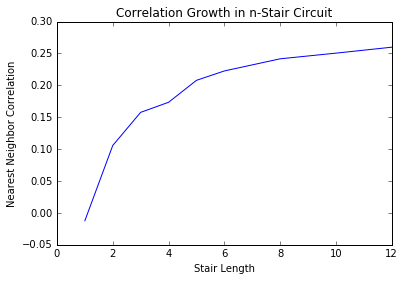

In [222]:
ns = [1,2,3,4,5,6,8,10,12]
N = 100
Steps = 1000
trials = 20
slopes = np.array([])
ts = np.arange(Steps+1)
avgcorrels = np.zeros(len(ns))

for idx, n in enumerate(ns):
    totcorrels = np.zeros(Steps+1)
    for m in range(trials):
        S = reset_S(N, 0)
        correls = np.array([get_correlation(S)])
        for i in range(Steps):
            S = stair_update_S(S, n)
            correls = np.append(correls, get_correlation(S))

        totcorrels += correls
    avgcorrels[idx] = np.average(totcorrels[.5*Steps:])/trials
plt.plot(ns, avgcorrels)
plt.title("Correlation Growth in n-Stair Circuit")
plt.xlabel("Stair Length")
plt.ylabel("Nearest Neighbor Correlation")
# plt.savefig("../figures/correlations/corr1-of-n.pdf")
plt.show()

-0.000145454545455
-0.000339393939394


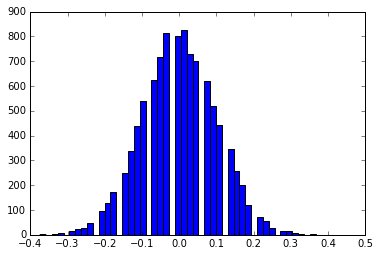

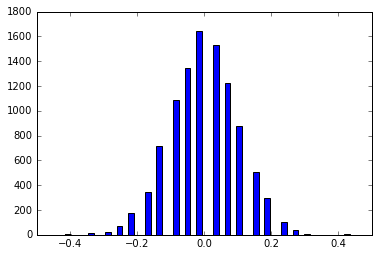

In [15]:
N = 10000
L = 100
m_start = 0
m = []
c = []
for i in range(N):
    S = reset_S(L, m_start)
    m.append((S[-1] - S[0])/(L-1))
    c.append(nth_correlator(S,10) - m_start**2)
#     print(get_correlation(S) == nth_correlation(S,1))
print(np.average(c))
print(np.average(m))
plt.hist(np.array(m), 50)
plt.show()
plt.hist(np.array(c), 50)
plt.show()

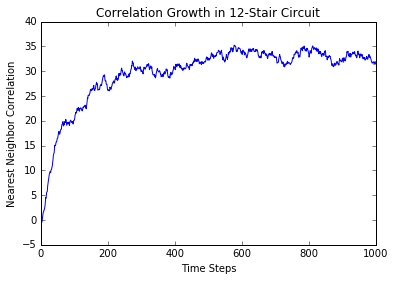

In [202]:
plt.plot(ts, totcorrels)
plt.title("Correlation Growth in 12-Stair Circuit")
plt.xlabel("Time Steps")
plt.ylabel("Nearest Neighbor Correlation")

In [197]:
trials

20

In [198]:
n

12